## PLS (Principal Least Squares Regression)

In [170]:
import pandas as pd
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
test_errors = pd.DataFrame(columns=['algorithm', 'test_error'])

In [2]:
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [3]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


### Prepare data

In [4]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

In [5]:
y = df['Salary']

In [6]:
X = pd.concat([X_, dummies[['League_N', 'Division_E', 'NewLeague_A']]], axis=1)

### Prepare train-test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [10]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [11]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [ 37.24246339],
       [-14.69680385]])

### PLS Prediction

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
y_predictions = pls_model.predict(X_train)

#### Train error

In [14]:
np.sqrt(mean_squared_error(y_train, y_predictions))

310.1167593109696

In [15]:
r2_score(y_train, y_predictions)

0.5140424486535482

### Test error

In [16]:
y_predictions_test = pls_model.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test, y_predictions_test))

398.09956327448526

In [18]:
r2_score(y_test, y_predictions_test)

0.2678940112232917

## Model Tuning

In [19]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    cvs = -1 * cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error')
    score = np.sqrt(cvs)
    RMSE.append(score)

### Visualize scores result

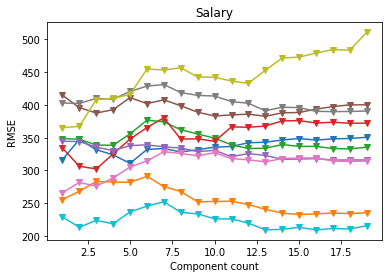

In [118]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v')
plt.xlabel('Component count')
plt.ylabel('RMSE')
plt.title('Salary');

### Optimum variable count is 2

### Create new PLS model with component count 2

In [21]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [22]:
y_predictions = pls_model.predict(X_test)

In [172]:
pls_test_error = np.sqrt(mean_squared_error(y_test, y_predictions))
test_errors = test_errors.append({'algorithm': 'pls', 'test_error': pls_test_error}, ignore_index=True)

## Ridge Regression

### Prepare Data

In [24]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [25]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [26]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
y = df['Salary']

In [27]:
X = pd.concat([X_, dummies[['League_A', 'Division_E', 'NewLeague_A']]], axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.linear_model import Ridge

In [30]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
ridge_model.coef_    

array([  -1.77435737,    8.80240528,    7.29595605,   -3.33257639,
         -2.08316481,    5.42531283,    7.58514945,   -0.13752764,
         -0.20779701,   -0.60361067,    1.7927957 ,    0.72866408,
         -0.68710375,    0.26153564,    0.26888652,   -0.52674278,
       -112.14640272,   99.80997876,   48.07152768])

### Create different ridge models with different lambda values

In [32]:
lamda_values = 10 ** np.linspace(10, -2, 100)*0.5

In [33]:
lamda_values[0:10]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08])

In [34]:
ridge_model = Ridge()
coefs = []

for i in lamda_values:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

Text(0, 0.5, 'Coefficients')

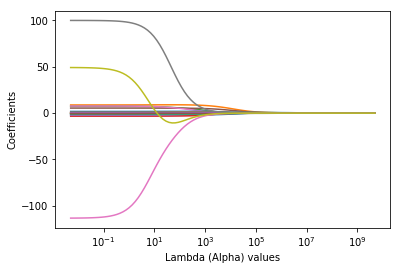

In [35]:
ax = plt.gca()
ax.plot(lamda_values, coefs)
ax.set_xscale('log')

plt.xlabel('Lambda (Alpha) values')
plt.ylabel('Coefficients')

### Predictions from ridge model with alpha = 0.1

In [36]:
y_pred = ridge_model.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828434

### Tuning

In [38]:
from sklearn.linear_model import RidgeCV

In [39]:
ridge_cv = RidgeCV(alphas=lamda_values, scoring='neg_mean_squared_error', normalize = True)

In [40]:
ridge_cv

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [43]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [50]:
ridge_cv.alpha_

0.7599555414764666

In [57]:
ridge_model_tuned = Ridge(alpha=ridge_cv.alpha_, normalize=True).fit(X_train, y_train)

#### Test error

In [176]:
ridge_test_error = np.sqrt(mean_squared_error(y_test, ridge_model_tuned.predict(X_test)))
test_errors = test_errors.append({'algorithm': 'ridge', 'test_error': ridge_test_error}, ignore_index=True)

## Lasso Regression

### Prepare Data

In [59]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [60]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [61]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
y = df['Salary']

In [62]:
X = pd.concat([X_, dummies[['League_A', 'Division_E', 'NewLeague_A']]], axis=1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
from sklearn.linear_model import Lasso, LassoCV

In [66]:
lasso_model = Lasso(alpha=0.1).fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388088, tolerance: 3898.686956380658
  positive)


In [67]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
       -1.12659630e+02,  9.99652090e+01,  4.81289395e+01])

In [74]:
lasso = Lasso()
lamda_values = 10** np.linspace(10, -2, 100)*0.5
coefs = []

for i in lamda_values:
    lasso.set_params(alpha = i);
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679515183, tolerance: 3898.686956380658
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374865472, tolerance: 3898.686956380658
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.7749357037

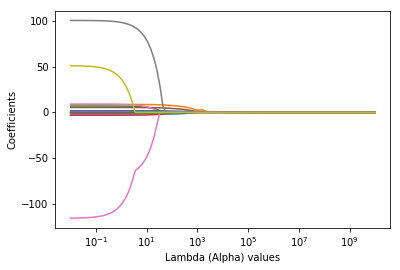

In [81]:
ax = plt.gca()
ax.plot(lamda_values * 2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda (Alpha) values')
plt.ylabel('Coefficients');

In [93]:
y_pred = lasso_model.predict(X_test)

In [94]:
y_pred

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148769

### cross validation for Lasso

In [195]:
from sklearn.linear_model import LassoCV

In [218]:
lasso_cv = LassoCV(alphas=None, max_iter=10000, normalize=True)
lasso_cv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [219]:
lasso_cv.alpha_

1.9612521983345392

In [220]:
lasso_model_tuned = Lasso(alpha=lasso_cv.alpha_, max_iter=10000).fit(X_train,y_train)

In [221]:
y_pred = lasso_model_tuned.predict(X_test)

In [225]:
lasso_test_erorr = np.sqrt(mean_squared_error(y_test, y_pred))

In [226]:
lasso_test_erorr

355.92343036578177

In [229]:
test_errors = test_errors.append({'algorithm': 'lasso', 'test_error': lasso_test_erorr}, ignore_index=True)

### Compare test errors

In [230]:
test_errors

,algorithm,test_error
0,pls,398.099563
1,ridge,386.682643
2,lasso,355.923430


## ElasticNet Regression

### Data preparation

In [231]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df.dropna(inplace=True)

dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
y = df['Salary']

X = pd.concat([X_, dummies[['League_A', 'Division_E', 'NewLeague_A']]], axis=1)

### Create ElasticNet model

In [232]:
from sklearn.linear_model import ElasticNet

In [233]:
elastic_net_model = ElasticNet().fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936734, tolerance: 3898.686956380658
  positive)


In [234]:
elastic_net_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
       -19.2186222 ,  31.16586592,  -8.98369938])

In [235]:
elastic_net_model.intercept_

-9.429499941633594

In [236]:
elastic_net_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

### Model tuning

In [237]:
from sklearn.linear_model import ElasticNetCV

In [241]:
elastic_net_cv = ElasticNetCV(cv = 10, random_state=0).fit(X_train, y_train)

In [245]:
elastic_net_cv.alpha_

5230.7647364798695

In [246]:
elastic_net_model_tuned = ElasticNet(alpha=elastic_net_cv.alpha_).fit(X_train, y_train)

In [247]:
y_predictions = elastic_net_model_tuned.predict(X_test)

In [248]:
elastic_net_error = np.sqrt(mean_squared_error(y_test, y_pred))

In [250]:
test_errors = test_errors.append({'algorithm': 'elastic_net', 'test_error': elastic_net_error}, ignore_index=True)

In [276]:
test_errors.sort_values(by=['test_error'])

,algorithm,test_error
2,lasso,355.923430
3,elastic_net,355.923430
1,ridge,386.682643
0,pls,398.099563


In [253]:
import seaborn as sns

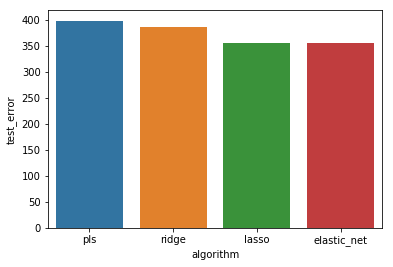

In [291]:
sns.barplot(x='algorithm', y='test_error', data=test_errors)

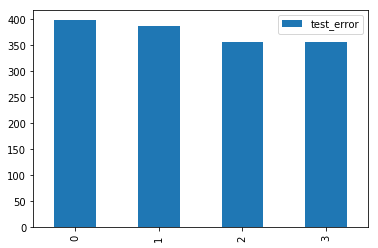

In [262]:
test_errors.plot.bar()